In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')
data

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [ ]:
#convert fulldate to datetime format
data.FullDate = pd.to_datetime(data['FullDate'])

In [ ]:
#set full date as index
data = data.set_index(['FullDate'])
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
#check for missing values
data.isna().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [237]:
#resampling data to be a daily data
df_daily = data.resample('D').sum()
df_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


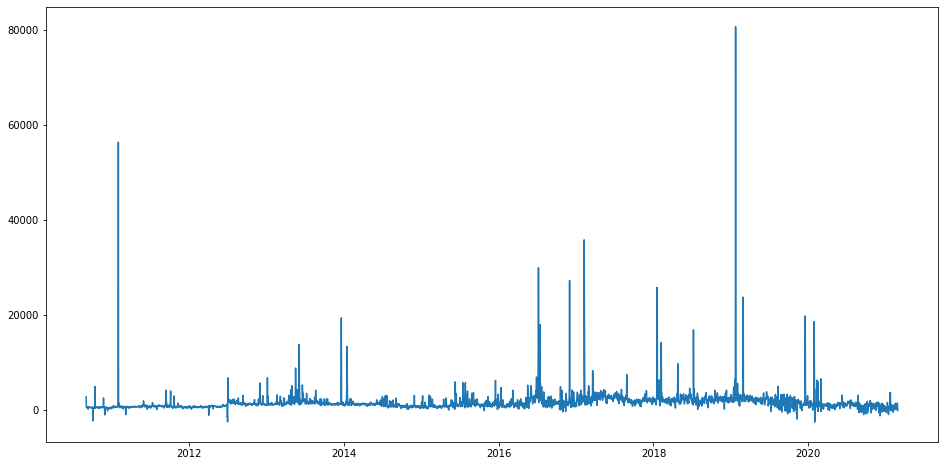

In [239]:
plt.plot(df_daily['ElecPrice'])

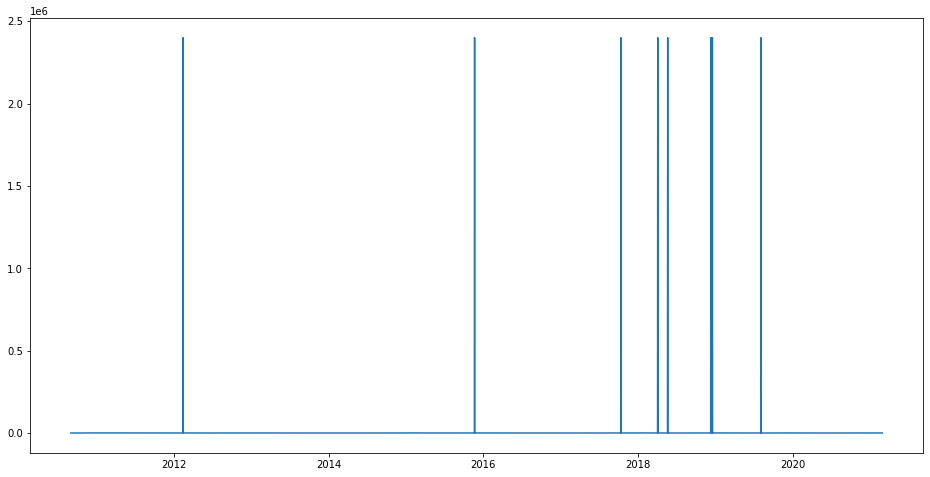

In [240]:
plt.plot(df_daily['Tmax'])

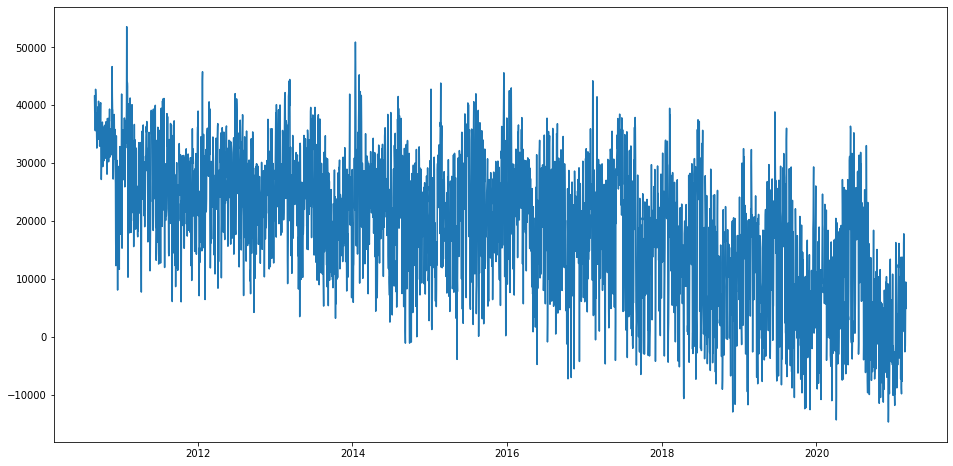

In [242]:
plt.plot(df_daily['SysLoad'])

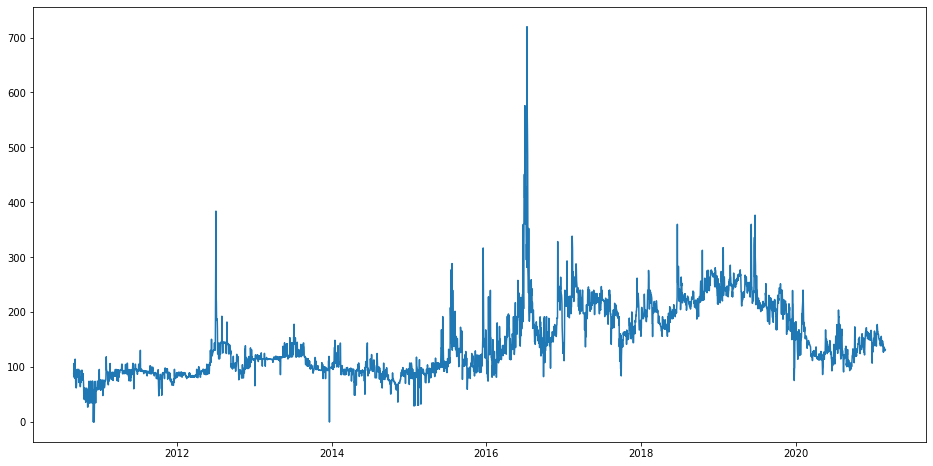

In [244]:
plt.plot(df_daily['GasPrice'])

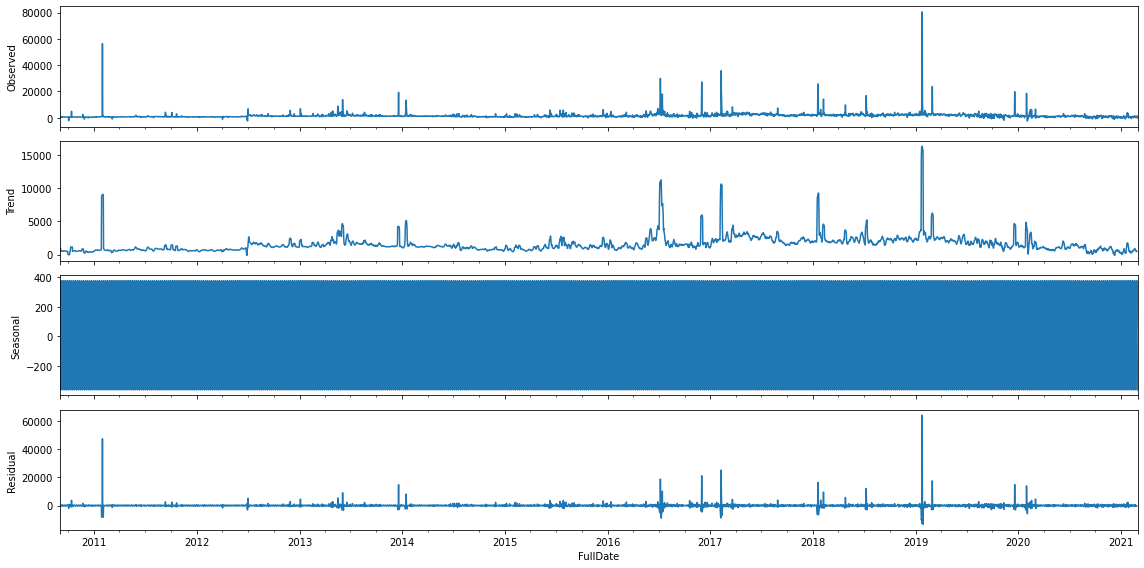

In [245]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 16,8
decompose_series = sm.tsa.seasonal_decompose(df_daily['ElecPrice'], model ='addittive')
decompose_series.plot()
plt.show()

In [246]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['ElecPrice'])
print(f'ADF Satistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags usde: {adf_result[2]}')
print(f'No. of observation used: {adf_result[3]}')
print(f'Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k} : {v}')

ADF Satistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags usde: 20
No. of observation used: 3813
Critical Values:
 1% : -3.432066157296446
 5% : -2.8622983040036005
 10% : -2.5671736550459663


In [ ]:
adf_result = adfuller(df_daily['Tmax'])
print(f'ADF Satistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags usde: {adf_result[2]}')
print(f'No. of observation used: {adf_result[3]}')
print(f'Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k} : {v}')

ADF Satistic: -20.766001357159357
p-value: 0.0
No. of lags usde: 6
No. of observation used: 3827
Critical Values:
 1% : -3.4320598750004825
 5% : -2.862295528895607
 10% : -2.567172177683642


In [ ]:
adf_result = adfuller(df_daily['SysLoad'])
print(f'ADF Satistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags usde: {adf_result[2]}')
print(f'No. of observation used: {adf_result[3]}')
print(f'Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k} : {v}')

ADF Satistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags usde: 30
No. of observation used: 3803
Critical Values:
 1% : -3.432070672988693
 5% : -2.8623002987378547
 10% : -2.567174716967499


In [ ]:
adf_result = adfuller(df_daily['GasPrice'])
print(f'ADF Satistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags usde: {adf_result[2]}')
print(f'No. of observation used: {adf_result[3]}')
print(f'Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k} : {v}')

ADF Satistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags usde: 27
No. of observation used: 3806
Critical Values:
 1% : -3.4320693157877544
 5% : -2.8622996992165364
 10% : -2.5671743978048323


In [ ]:
#reset the index
df_daily = df_daily.reset_index()
df_daily

,FullDate,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [ ]:
#rename the fulldate and elecprice
df_daily = df_daily.rename(columns={'FullDate':'ds','ElecPrice':'y'})
df_daily

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [ ]:
#split data into train and test
univariate_train=df_daily[:2757]
univariate_test = df_daily[2757:]

In [ ]:
#bulding  univariate model for elecprice prediction
from fbprophet import Prophet
univariate_model = Prophet()
univariate_model.fit(univariate_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#make forecasts with our univariate model
future = univariate_model.make_future_dataframe(periods =len(univariate_test),freq='D')
future.tail()

,ds
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27
3833,2021-02-28


In [ ]:
#make forecasts with our univariate model
univariate_forecast = univariate_model.predict(future)
univariate_forecast.head()
univariate_forecast[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,996.028134,-1415.899515,3517.407181,851.777631,851.777631,851.777631
1,2010-09-02,1076.181083,-1309.620937,3409.499641,851.727173,851.727173,851.727173
2,2010-09-03,851.092206,-1504.081992,3271.722585,851.676716,851.676716,851.676716
3,2010-09-04,510.753732,-1830.938974,2878.524835,851.626258,851.626258,851.626258
4,2010-09-05,420.690845,-1976.029021,2938.642287,851.575800,851.575800,851.575800
...,...,...,...,...,...,...,...
3829,2021-02-24,3475.863766,689.545478,6651.452321,3567.126543,1854.391643,5283.596850
3830,2021-02-25,3542.743730,467.071838,6416.502226,3567.943112,1851.948009,5283.620747
3831,2021-02-26,3309.660718,452.180511,6117.724574,3568.759681,1849.566081,5285.715947
3832,2021-02-27,2966.465610,120.221525,6125.983230,3569.576250,1847.184154,5288.520235


In [ ]:
pred = univariate_forecast['yhat'][2757:]
actual = univariate_test['y']

In [ ]:
df1 = pd.DataFrame({'date':univariate_forecast.ds,'actual':univariate_test.y,'pred':univariate_forecast.yhat})
df1.tail()

,date,actual,pred
3829,2021-02-24,634.770,3475.863766
3830,2021-02-25,577.515,3542.743730
3831,2021-02-26,1445.495,3309.660718
3832,2021-02-27,488.980,2966.465610
3833,2021-02-28,-98.985,2878.477834


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
r2 = r2_score(actual,pred)
round(r2,2)

-0.25

In [ ]:
mae = mean_absolute_error(actual,pred)
round(mae,2)

1748.52

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
def mape(actual,pred):
    return round(np.mean(np.abs((actual-pred)/actual))*100,2)
mape(actual,pred)

549.48

In [234]:
rsme=mean_squared_error(actual, pred, squared=False)
rsme

3218.15577651241

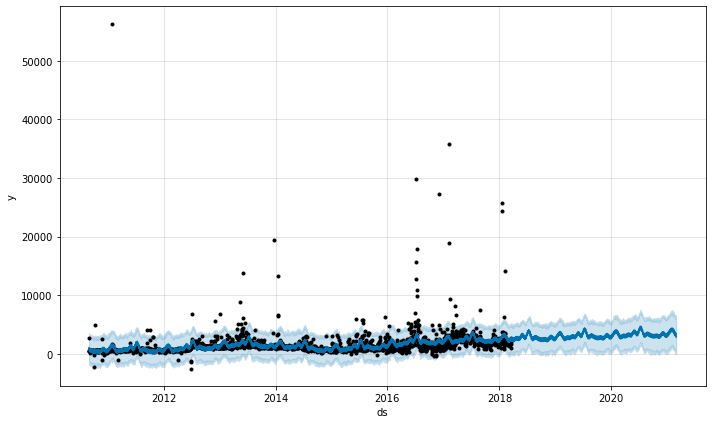

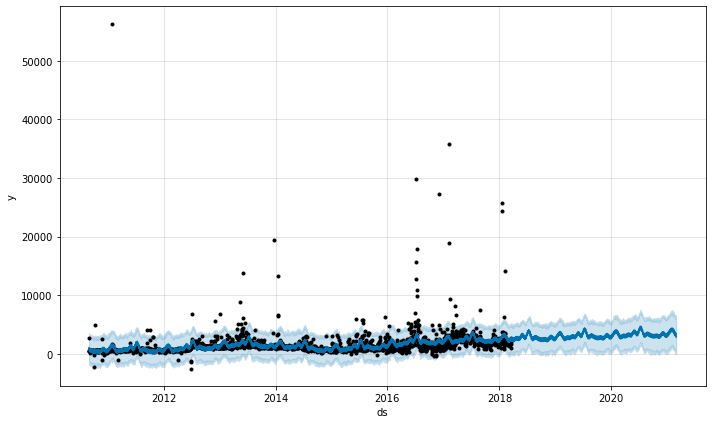

In [ ]:
univariate_model.plot(univariate_forecast)

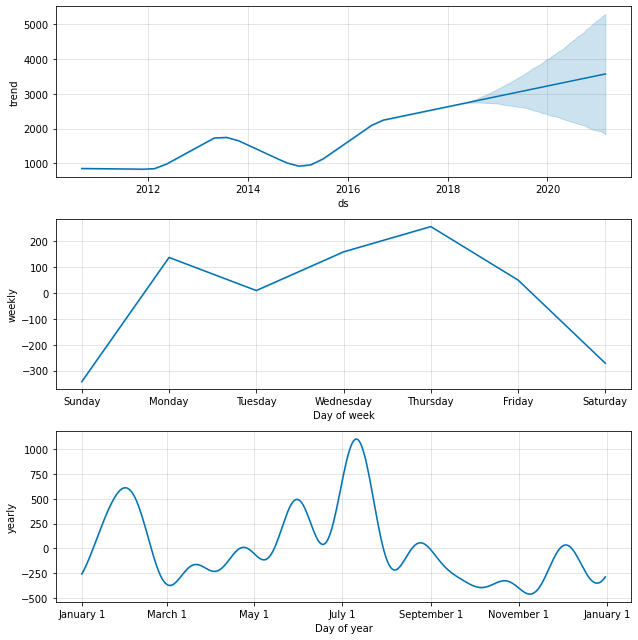

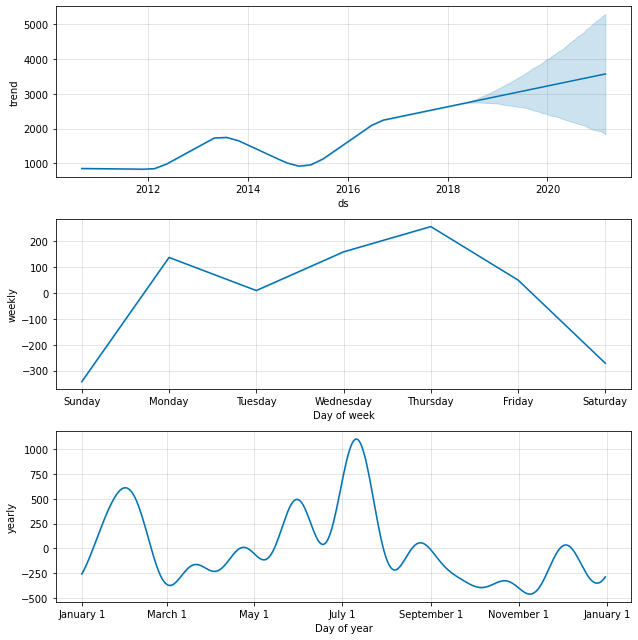

In [ ]:
univariate_model.plot_components(univariate_forecast)

In [ ]:
#creating multivariate dataset for building multivariate model 
multivariate_df_daily = df_daily.rename(columns={'Tmax':'add1','SysLoad':'add2','GasPrice':'add3'})
multivariate_df_daily

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [ ]:
#split the data into train and test
multivariate_train = multivariate_df_daily[:2757]
multivariate_test = multivariate_df_daily[2757:]

In [ ]:
#building multivariate model with regressors
multivariate_model = Prophet()
multivariate_model.add_regressor('add1')
multivariate_model.add_regressor('add2')
multivariate_model.add_regressor('add3')
multivariate_model.fit(multivariate_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m_future = multivariate_model.make_future_dataframe(periods = len(multivariate_test), freq='D')
m_future['add1'] = multivariate_df_daily['add1']
m_future['add2'] = multivariate_df_daily['add2']
m_future['add3'] = multivariate_df_daily['add3']
multivariate_forecast = multivariate_model.predict(m_future)
multivariate_forecast[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,1506.402210,-866.681797,3719.805400,985.569713,985.569713,985.569713
1,2010-09-02,1458.000610,-773.944625,3655.527145,986.126153,986.126153,986.126153
2,2010-09-03,1687.666557,-345.551674,3995.475356,986.682593,986.682593,986.682593
3,2010-09-04,902.434197,-1504.017396,3053.147038,987.239034,987.239034,987.239034
4,2010-09-05,1319.929104,-1066.128164,3415.207072,987.795474,987.795474,987.795474
...,...,...,...,...,...,...,...
3829,2021-02-24,953.896217,-1427.728490,3240.470023,2601.752905,1819.282287,3422.380353
3830,2021-02-25,1313.507388,-1103.671409,3827.568895,2602.439338,1818.729916,3425.427529
3831,2021-02-26,1377.373852,-1058.839884,3808.641066,2603.125772,1818.193936,3428.474705
3832,2021-02-27,1032.301956,-1205.929997,3456.231290,2603.812205,1817.694727,3430.524899


In [ ]:
m_actual = multivariate_test['y']
m_pred = multivariate_forecast['yhat'][2757:]

In [ ]:
r2 = r2_score(m_actual,m_pred)
round(r2,2)

0.11

In [ ]:
mae = mean_absolute_error(m_actual, m_pred)
round(mae,2)

984.22

In [227]:
from sklearn.metrics import mean_absolute_percentage_error
def mape(actual,pred):
    return round(np.mean(np.abs((m_actual-m_pred)/m_actual))*100,2)
mape(m_actual,m_pred)

231.38

In [233]:
from math import sqrt
rmse = sqrt(mean_squared_error(m_actual, m_pred))
round(rsme,2)

2712.93

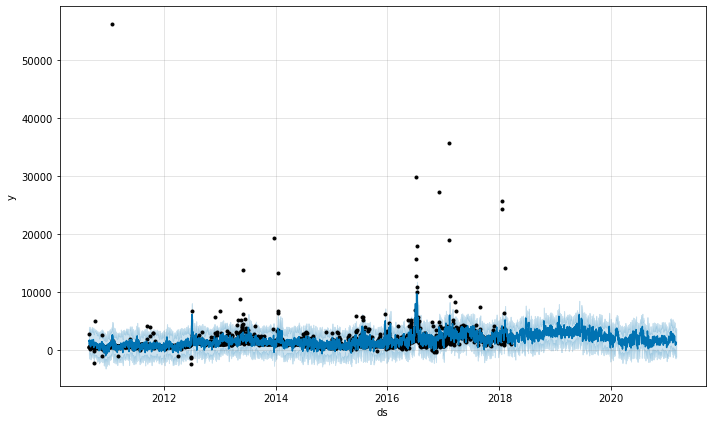

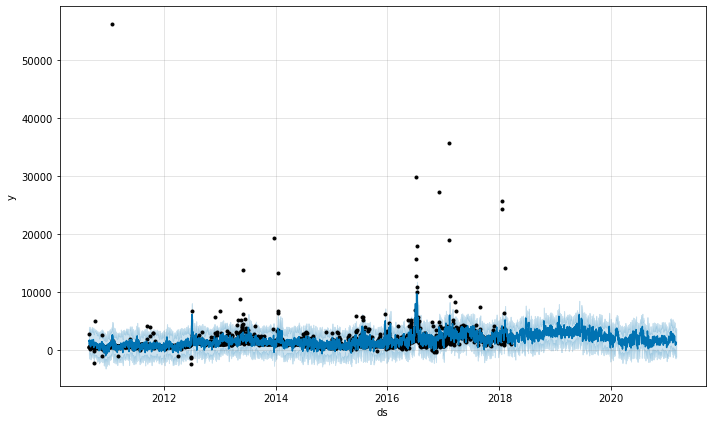

In [ ]:
multivariate_model.plot(multivariate_forecast)

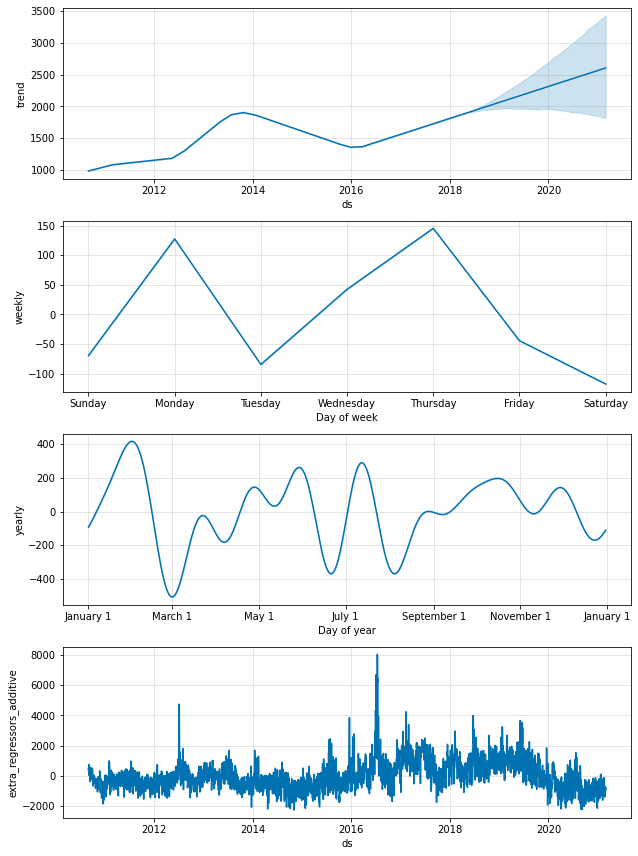

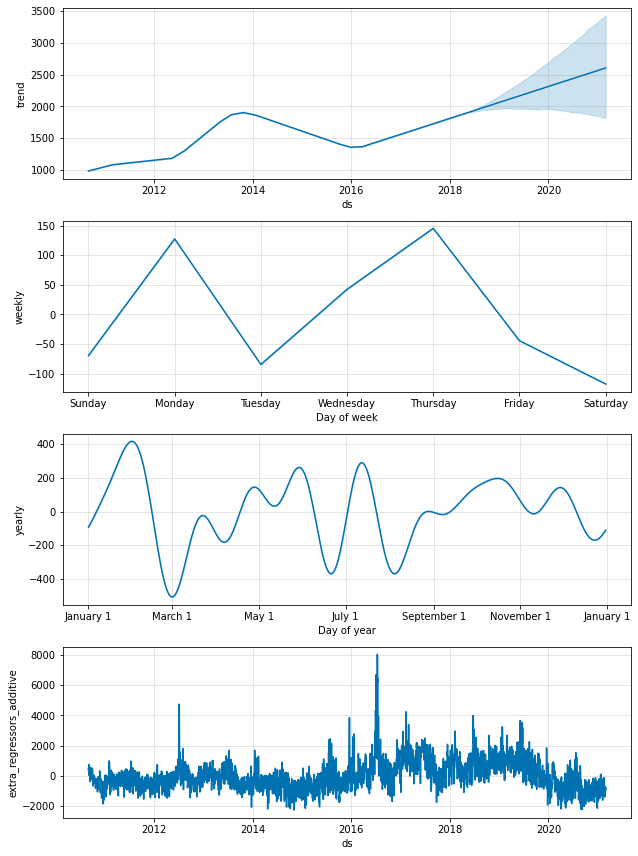

In [ ]:
multivariate_model.plot_components(multivariate_forecast)

In [ ]:
multivariate_df_daily2 = pd.DataFrame(({'ds': df_daily.ds, 'y': df_daily.y.values, 'add1' : df_daily.SysLoad.values, 'add2' : df_daily.GasPrice.values})
)
multivariate_df_daily2

,ds,y,add1,add2
0,2010-09-01,2751.700,41565.38000,88.5600
1,2010-09-02,570.810,38898.99000,88.5600
2,2010-09-03,504.975,41665.76000,106.8000
3,2010-09-04,502.275,35638.08500,81.3600
4,2010-09-05,500.555,35611.41000,106.8000
...,...,...,...,...
3829,2021-02-24,634.770,-1525.49745,134.4000
3830,2021-02-25,577.515,4539.07855,130.5048
3831,2021-02-26,1445.495,9517.02430,130.1808
3832,2021-02-27,488.980,4932.88015,130.0800


In [228]:
multivariate_train2 = multivariate_df_daily2[:2757]
multivariate_test2 = multivariate_df_daily2[2757:]

In [ ]:
multivariate_model2 = Prophet()
multivariate_model2.add_regressor('add1')
multivariate_model2.add_regressor('add2')
multivariate_model2.fit(multivariate_train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m_future2 = multivariate_model2.make_future_dataframe(periods = len(multivariate_test2),freq = "D")
m_future2['add1'] = multivariate_df_daily2['add1']
m_future2['add2'] = multivariate_df_daily2['add2']
m_forecast2 = multivariate_model2.predict(m_future2)
m_forecast2[['yhat','yhat_lower','yhat_upper']]

,yhat,yhat_lower,yhat_upper
0,1513.676257,-675.693643,3804.145677
1,1464.819638,-665.734351,3674.211075
2,1695.396518,-573.070643,3860.124542
3,909.188819,-1336.791106,3144.720236
4,1327.804807,-828.328754,3625.338432
...,...,...,...
3829,987.810902,-1300.593753,3304.737629
3830,1346.884788,-1139.424700,3649.071517
3831,1411.337184,-1057.453386,3871.105975
3832,1065.874960,-1367.887824,3490.498795


In [ ]:
m_actual2 = multivariate_test2['y']
m_pred2 = m_forecast2['yhat'][2757:]

In [ ]:
r2 = r2_score(m_actual2,m_pred2)
round(r2,2)

0.11

In [ ]:
mae = mean_absolute_error(m_actual2, m_pred2)
round(mae,2)

1003.62

In [229]:
from sklearn.metrics import mean_absolute_percentage_error
def mape(actual,pred):
    return round(np.mean(np.abs((m_actual2-m_pred2)/m_actual2))*100,2)
mape(m_actual2,m_pred2)

236.66

In [231]:
rsme = sqrt(mean_squared_error(m_actual2,m_pred2))
round(rsme,2)

2712.93